In [7]:
import keras
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Dropout
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
base_model = VGG19(include_top=False, weights='imagenet', pooling='max')

FC_SIZE_1 = 256
NUMCLASSES = 2

for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Dense(FC_SIZE_1, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x) #kernel_regularizer=regularizers.l2(0.1)
x = Dropout(0.4)(x)
#x = Dense(FC_SIZE_2, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
predictions = Dense(NUMCLASSES , activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers[165:]:
#    layer.trainable = True

model.summary()
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)
    
adam = keras.optimizers.Adam(lr=0.0005, decay=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
train_datagen =  ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    zoom_range=[0.5,1],
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=128,
#     save_to_dir = 'train_g',
#     save_format='jpeg',
    shuffle=True)
validation_generator = test_datagen.flow_from_directory(
    'validation',
    target_size=(224, 224),
    batch_size=128,
    shuffle=True)


Found 1093 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [4]:
history = model.fit_generator(
    train_generator,
    epochs=40,
    validation_data=validation_generator) 
with open('log_vgg_1.txt','a') as f:
    f.write("\n")
    f.write(str(history.history))
model.save('my_model_5.h5')

Epoch 1/40
8/9 [=========================>....] - ETA: 2s - loss: 7.8755 - acc: 0.6577

D:\Anaconda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


9/9 [==============================] - 20s 2s/step - loss: 7.5078 - acc: 0.6803 - val_loss: 4.6343 - val_acc: 0.8939
Epoch 2/40
9/9 [==============================] - 17s 2s/step - loss: 4.4478 - acc: 0.9068 - val_loss: 3.7134 - val_acc: 0.9545
Epoch 3/40
9/9 [==============================] - 18s 2s/step - loss: 3.8994 - acc: 0.9362 - val_loss: 3.6754 - val_acc: 0.9621
Epoch 4/40
9/9 [==============================] - 18s 2s/step - loss: 3.6793 - acc: 0.9519 - val_loss: 3.3905 - val_acc: 0.9697
Epoch 5/40
9/9 [==============================] - 18s 2s/step - loss: 3.4730 - acc: 0.9557 - val_loss: 3.2139 - val_acc: 0.9697
Epoch 6/40
9/9 [==============================] - 18s 2s/step - loss: 3.2521 - acc: 0.9644 - val_loss: 3.0557 - val_acc: 0.9848
Epoch 7/40
9/9 [==============================] - 18s 2s/step - loss: 3.2243 - acc: 0.9620 - val_loss: 2.9741 - val_acc: 0.9848
Epoch 8/40
9/9 [==============================] - 18s 2s/step - loss: 3.1114 - acc: 0.9688 - val_loss: 2.9013 - val

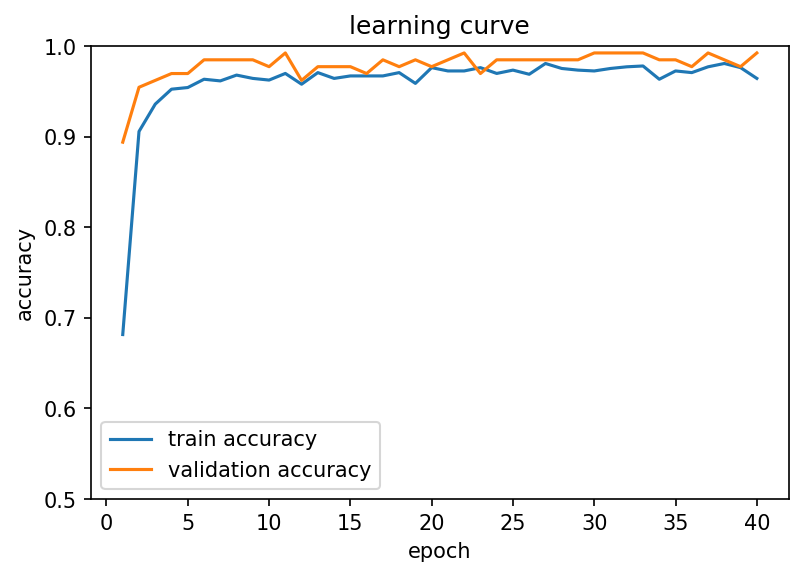

In [5]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
x_acc = range(1, len(acc)+1)
x_val_acc = range(1, len(val_acc)+1)
plt.figure(dpi=150)
l1, = plt.plot(x_acc, acc)
l2, = plt.plot(x_val_acc, val_acc)
plt.legend(handles=[l1, l2], labels=['train accuracy', 'validation accuracy'], loc='best')
plt.ylim(0.5,1)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("learning curve")
plt.savefig ("6.jpg", dpi=150)
plt.show()

Epoch 1/40
6/9 [===================>..........] - ETA: 6s - loss: 1.8278 - acc: 0.9596

D:\Anaconda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


9/9 [==============================] - 19s 2s/step - loss: 1.8559 - acc: 0.9583 - val_loss: 1.3925 - val_acc: 0.9924
Epoch 2/40
9/9 [==============================] - 18s 2s/step - loss: 1.9254 - acc: 0.9467 - val_loss: 1.4521 - val_acc: 0.9848
Epoch 3/40
9/9 [==============================] - 18s 2s/step - loss: 1.6642 - acc: 0.9687 - val_loss: 1.4170 - val_acc: 0.9924
Epoch 4/40
9/9 [==============================] - 18s 2s/step - loss: 1.8392 - acc: 0.9566 - val_loss: 1.4001 - val_acc: 0.9924
Epoch 5/40
9/9 [==============================] - 18s 2s/step - loss: 1.6269 - acc: 0.9695 - val_loss: 1.3136 - val_acc: 0.9924
Epoch 6/40
9/9 [==============================] - 18s 2s/step - loss: 1.5414 - acc: 0.9777 - val_loss: 1.3978 - val_acc: 0.9848
Epoch 7/40
9/9 [==============================] - 18s 2s/step - loss: 1.4051 - acc: 0.9845 - val_loss: 1.2243 - val_acc: 1.0000
Epoch 8/40
9/9 [==============================] - 18s 2s/step - loss: 1.4537 - acc: 0.9799 - val_loss: 1.3613 - val

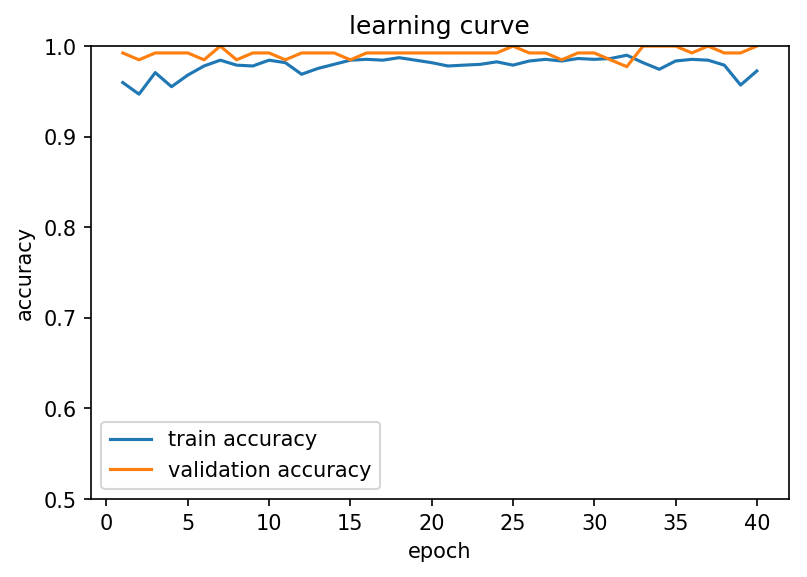

In [8]:
model=load_model('my_model_5.h5')
history = model.fit_generator(
    train_generator,
    epochs=40,
    validation_data=validation_generator)
with open('log_vgg_1.txt','a') as f:
    f.write("\n")
    f.write(str(history.history))
model.save('my_model_5.h5')
acc = history.history["acc"]
val_acc = history.history["val_acc"]
x_acc = range(1, len(acc)+1)
x_val_acc = range(1, len(val_acc)+1)
plt.figure(dpi=150)
l1, = plt.plot(x_acc, acc)
l2, = plt.plot(x_val_acc, val_acc)
plt.legend(handles=[l1, l2], labels=['train accuracy', 'validation accuracy'], loc='best')
plt.ylim(0.5,1)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("learning curve")
plt.savefig ("7.jpg", dpi=150)
plt.show()